# Approximate $\tau_0$ and scale the burst drift

$ \tau_0 \simeq \frac{b}{\cos\theta} $ Where $b$ is the minor axis of the gaussian fit to the burst autocorrelation.
Then, if $d\nu_{\text{obs}} / dt_{\text{obs}}$ is the burst drift, we expect 


### $\frac{d\nu_{\text{obs}}}{dt_{\text{obs}}}=\frac{\nu_{\text{obs}}^{2}}{\nu_{0}\tau_{0}}\simeq\frac{\nu_{\text{obs}}^{2}b}{\nu_{0}\cos\theta}$

In [1]:
import numpy as np
import scipy.stats
import scipy.odr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from tqdm import tqdm
import functools
print = functools.partial(print, flush=True) # print doesn't happen til script ends so force it to flush... windows thing?
import pandas as pd

bursts = pd.read_csv('bursts.csv')
bursts = bursts.set_index('name')

In [2]:
bursts

,filename,edge,angle,peak,sigmax,sigmay,Slope,drift (mhz/ms),drift error (mhz/ms),center,center_f,time_res,freq_res,sigmax_error,sigmay_error,angle_error,red_chisq,stale?
name,,,,,,,,,,,,,,,,,,
M1,01_puppi_57747_C0531+33_0558_5.dm559.72.calibP...,1525.0,1.720000,1.042900e+04,173.731526,47.364587,-6.652439,-1039.359422,0.190767,228.755888,4458.212325,0.000010,1.562500,0.011140,0.003007,0.000026,9.733683,NaN
M2,02_puppi_57747_C0531+33_0558_1183.dm559.72.cal...,1850.0,1.780000,5.692000e+03,177.080918,44.911875,-4.736866,-740.578566,0.652317,209.060564,4427.438381,0.000010,1.562500,0.081784,0.020486,0.000174,3.818413,NaN
M3,03_puppi_57747_C0531+33_0558_1202.dm559.72.cal...,1975.0,1.620000,5.668000e+03,169.749001,19.463885,-19.669528,-2823.770453,2.623174,249.051665,4489.924477,0.000010,1.562500,0.052822,0.005950,0.000050,4.049445,NaN
M4,04_puppi_57747_C0531+33_0558_25437.dm559.72.ca...,1450.0,1.710000,5.038000e+03,160.360329,26.706231,-7.137257,-1104.756403,21.768613,322.029396,4603.952181,0.000010,1.562500,1.780140,0.292807,0.002672,3.318850,NaN
M5,05_puppi_57747_C0531+33_0558_3683.dm559.72.cal...,1450.0,1.639204,5.031000e+03,37.747383,166.280492,-14.595503,-2111.819665,67.749909,214.396765,4435.776195,0.000010,1.562500,0.258022,1.153948,0.002306,3.360715,NaN
M6,06_puppi_57747_C0531+33_0558_3687.dm559.72.cal...,1150.0,1.590000,5.569000e+03,156.557708,12.416683,-52.066970,-6051.049490,11.249634,263.938012,4513.184394,0.000010,1.562500,0.065385,0.005173,0.000047,6.719788,NaN
M7,07_puppi_57747_C0531+33_0558_3688.dm559.72.cal...,1590.0,1.720000,5.821000e+03,102.259272,38.969184,-6.652439,-1019.972935,0.845772,160.167242,4351.042566,0.000010,1.562500,0.019954,0.007547,0.000121,6.302707,NaN
M8,08_puppi_57747_C0531+33_0558_3689.dm559.72.cal...,2000.0,1.990000,5.666000e+03,171.395398,64.792725,-2.244076,-340.369797,0.064490,296.067560,4563.386812,0.000010,1.562500,0.019619,0.007370,0.000071,6.146570,NaN
M9,09_puppi_57747_C0531+33_0558_3690.dm559.72.cal...,1600.0,2.240000,5.041000e+03,133.024941,89.628038,-1.264288,-191.720931,5.297999,216.215087,4438.617323,0.000010,1.562500,1.038778,0.697559,0.013465,3.361416,"dont use, see 9a,b"


Text(0.5, 0, 'Burst #')

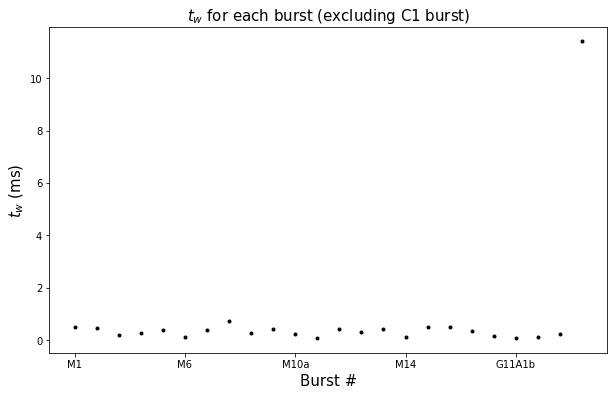

In [3]:
bursts['drift_abs'] = abs(bursts['drift (mhz/ms)'])
bursts['min_sigma'] = bursts[['sigmax','sigmay']].apply(lambda row: min(row['sigmax'], row['sigmay']), axis=1)
bursts['max_sigma'] = bursts[['sigmax','sigmay']].apply(lambda row: max(row['sigmax'], row['sigmay']), axis=1)
# the following two lines assume that if sigmax > sigmay, then sigmax_error > sigmay_error, which is true (so far) for this dataset
bursts['min_sigma_error'] = bursts[['sigmax_error','sigmay_error']].apply(lambda row: min(row['sigmax_error'], row['sigmay_error']), axis=1)
bursts['max_sigma_error'] = bursts[['sigmax_error','sigmay_error']].apply(lambda row: max(row['sigmax_error'], row['sigmay_error']), axis=1)

bursts['sigma_t']   = bursts[['min_sigma','time_res']].apply(lambda row: row['min_sigma']*row['time_res'], axis=1)

bursts['tau_w'] = bursts[['time_res', 'min_sigma', 'max_sigma', 'angle']].apply(
    lambda r: r['time_res']*r['min_sigma']*r['max_sigma'] / np.sqrt( np.abs((np.sin(r['angle']-np.pi/2)*r['min_sigma'])**2 + (np.cos(r['angle']-np.pi/2)*r['max_sigma'])**2 )), 
    axis=1
)

# this error is in ms
bursts['tau_w_error'] = bursts[['time_res', 'min_sigma', 'max_sigma', 'min_sigma_error', 'max_sigma_error', 'angle', 'angle_error']].apply(
    lambda r: 1e3*r['time_res']*np.sqrt((r['angle_error']**2*r['max_sigma']**2*r['min_sigma']**2*(2*r['max_sigma']**2*np.cos(r['angle']-np.pi/2)*np.sin(r['angle']-np.pi/2) - 2*r['min_sigma']**2*np.cos(r['angle']-np.pi/2)*np.sin(r['angle']-np.pi/2))**2)/(4.*(r['min_sigma']**2*np.cos(r['angle']-np.pi/2)**2 + r['max_sigma']**2*np.sin(r['angle']-np.pi/2)**2)**3)+ r['min_sigma_error']**2*(-((r['max_sigma']*r['min_sigma']**2*np.cos(r['angle']-np.pi/2)**2)/(r['min_sigma']**2*np.cos(r['angle']-np.pi/2)**2 + r['max_sigma']**2*np.sin(r['angle']-np.pi/2)**2)**1.5) + r['max_sigma']/np.sqrt(r['min_sigma']**2*np.cos(r['angle']-np.pi/2)**2 + r['max_sigma']**2*np.sin(r['angle']-np.pi/2)**2))**2+ r['max_sigma_error']**2*(-((r['max_sigma']**2*r['min_sigma']*np.sin(r['angle']-np.pi/2)**2)/(r['min_sigma']**2*np.cos(r['angle']-np.pi/2)**2 + r['max_sigma']**2*np.sin(r['angle']-np.pi/2)**2)**1.5) + r['min_sigma']/np.sqrt(r['min_sigma']**2*np.cos(r['angle']-np.pi/2)**2 + r['max_sigma']**2*np.sin(r['angle']-np.pi/2)**2))**2),
    axis=1
)

bursts['sigma_t_ms'] = bursts['sigma_t']*1e3
bursts['tau_w_ms'] = bursts['tau_w']*1e3

## C1 
bursts.at['C1', 'tau_w_ms'] = 11.4
bursts.at['C1', 'tau_w'] = 11.4/1000
bursts.at['C1', 'tau_w_error'] = 0.12

bursts_to_include = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9a', 'M9b', 'M10a', 'M10b', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'G11D', 'G11A1a', 'G11A1b', 'G11A2', 'G11A3', 'C1']
fontsize=15

selectbursts = bursts.loc[bursts_to_include]
ax = selectbursts['tau_w_ms'].plot(style='k.', figsize=(10,6))
ax.set_title("$t_w$ for each burst (excluding C1 burst)", size=fontsize)
ax.set_ylabel('$t_w$ (ms)', size=fontsize)
ax.set_xlabel('Burst #', size=fontsize)
# plt.savefig('tw.png')

In [4]:
def reciprocal(x, a):
	return a/x

def reciprocal_log(x, b):
	return -x+b

def log_log(x, k, b):
	return k*x+b

def reciprocal_odr(B, x):
    return B[0]/x

def reciprocal_odr_log(B, x):
	return -x+B[0]

def fitreciprocal(x, data, sigma=1):
    guess = [522]
    abs_sigma = True
    if (type(sigma) == int) and (sigma == 1):
        abs_sigma = False
    sigma = np.zeros(len(data.ravel())) + sigma

    sigma = np.zeros(len(data.ravel())) + sigma
    popt, pcov = scipy.optimize.curve_fit(reciprocal, x, data, p0=guess, sigma=sigma, absolute_sigma=abs_sigma)
    return popt, pcov

def fitreciprocal_log(x, data, sigma=1, loglog=False):
    guess = [522]
    abs_sigma = True
    if (type(sigma) == int) and (sigma == 1):
        abs_sigma = False
    sigma = np.zeros(len(data.ravel())) + sigma
    
    if loglog:
        guess = [1,1]
        popt, pcov = scipy.optimize.curve_fit(log_log, x, data, p0=guess, sigma=sigma, absolute_sigma=abs_sigma)
    else:
        popt, pcov = scipy.optimize.curve_fit(reciprocal_log, x, data, p0=guess, sigma=sigma, absolute_sigma=abs_sigma)
    return popt, pcov

fit_model = scipy.odr.Model(reciprocal_odr)
fit_model_log = scipy.odr.Model(reciprocal_odr_log)

In [5]:
selectbursts['color'] = 'c'
selectbursts.at[selectbursts.index > 'M', 'color'] = 'r'
selectbursts.at['C1', 'color'] = 'b'
michillibursts = selectbursts.head(18)
otherbursts = selectbursts.tail(6)

# selectbursts['drift error (mhz/ms)']['M8'] = 0.06448979034795*1

# Correct to the average Michilli burst frequency:
nu_obs0 = np.mean(michillibursts[['center_f']])
otherbursts['drift_corr'] = otherbursts[['drift_abs','center_f']].apply(lambda row: row['drift_abs']*(nu_obs0 / row['center_f'])**2, axis=1)
otherbursts['drift_err_corr'] = otherbursts[['drift error (mhz/ms)','center_f']].apply(lambda row: row['drift error (mhz/ms)']*(nu_obs0 / row['center_f'])**2, axis=1)
otherbursts['tau_w_ms_corr'] = otherbursts[['tau_w_ms','center_f']].apply(lambda row: row['tau_w_ms']*(row['center_f'] / nu_obs0), axis=1)
otherbursts['tau_w_err_corr'] = otherbursts[['tau_w_error','center_f']].apply(lambda row: row['tau_w_error']*(row['center_f'] / nu_obs0), axis=1)
print(nu_obs0)
otherbursts[['tau_w_ms', 'tau_w_ms_corr', 'drift_abs', 'drift_corr', 'tau_w_error', 'tau_w_err_corr', 'drift error (mhz/ms)', 'drift_err_corr', 'center_f', ]]

center_f    4472.188306
dtype: float64


C:\Users\hmsmo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\hmsmo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\hmsmo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,tau_w_ms,tau_w_ms_corr,drift_abs,drift_corr,tau_w_error,tau_w_err_corr,drift error (mhz/ms),drift_err_corr,center_f
name,,,,,,,,,
G11D,0.353628,0.551509,1701.392924,699.506071,0.002238,0.003491,0.967031,0.397583,6974.717930
G11A1a,0.140691,0.226553,6749.651926,2602.991893,0.004491,0.007231,21.967232,8.471626,7201.523174
G11A1b,0.081069,0.127125,7336.763933,2983.713399,0.005493,0.008614,14.656192,5.960377,7012.837929
G11A2,0.112588,0.159458,3929.513225,1958.970989,0.006737,0.009541,4.889863,2.437732,6333.962048
G11A3,0.249589,0.317088,1636.407401,1013.869843,0.005231,0.006646,1.813690,1.123709,5681.652873
C1,11.400000,1.605925,3.920000,197.535489,0.120000,0.016904,0.010000,0.503917,630.000000


nlsq: [292.61372156] [0.23642482]
nlsq noe: [809.93162028] [105.40044143]
nlsq log: [375.22965844] [1.40212135]
nlsq log noe: [457.40102288] [1.12131721]
loglog: [-1.51553985  5.51566468] [0.17056198 0.22267027]
odr: [292.64153292] [22.02810491]
odr log: [443.47635399] [1.11039458]


C:\Users\hmsmo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:98: RuntimeWarning: divide by zero encountered in true_divide


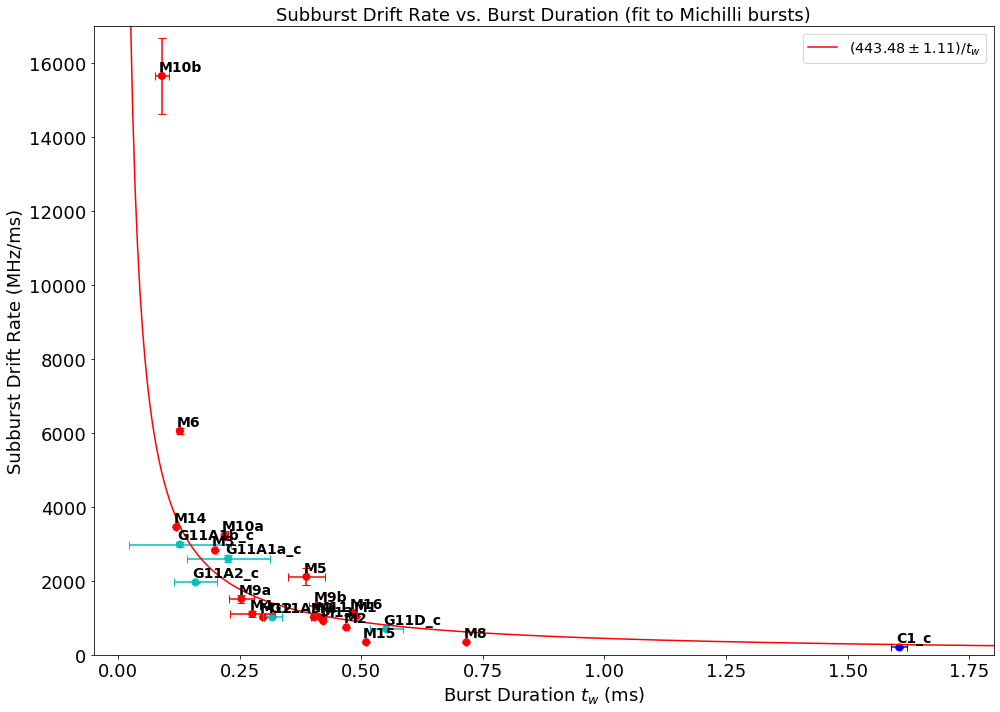

In [10]:
# Gajjar test to michili fit
mpl.rcParams["errorbar.capsize"] = 4
markersize = 50
fontsize = 18
annotsize = 14
logscale = False
filename = 'drift_vs_tw_michilli_log.png' if logscale else 'drift_vs_tw_michilli.png'

ax = michillibursts.plot.scatter(x='tau_w_ms', y='drift_abs', 
                               xerr=michillibursts['red_chisq']*michillibursts['tau_w_error'], yerr=michillibursts['red_chisq']*michillibursts['drift error (mhz/ms)'], 
                               figsize=(14, 10), s=markersize, c='color', colorbar=False, fontsize=fontsize, logy=logscale, logx=logscale)
for k, v in michillibursts.iterrows():
    ax.annotate(k, (v['tau_w_ms'], v['drift_abs']), xytext=(-3,5), textcoords='offset points', weight='bold', size=annotsize)

otherbursts.head(5).plot.scatter(ax=ax, x='tau_w_ms_corr', y='drift_corr',
                         xerr=otherbursts['red_chisq']*otherbursts['tau_w_err_corr'], yerr=otherbursts['red_chisq']*otherbursts['drift_err_corr'], 
                         figsize=(14, 10), s=markersize, c='color', colorbar=False)
otherbursts.tail(1).plot.scatter(ax=ax, x='tau_w_ms_corr', y='drift_corr',
                         xerr=otherbursts['red_chisq']*otherbursts['tau_w_err_corr'], yerr=otherbursts['red_chisq']*otherbursts['drift_err_corr'], 
                         figsize=(14, 10), s=markersize, c='color', colorbar=False)
for k, v in otherbursts.iterrows():
    ax.annotate(k+'_c', (v['tau_w_ms_corr'], v['drift_corr']), xytext=(-3,5), textcoords='offset points', weight='bold', size=annotsize)
    
if not logscale:
    ax.set_xlim(-0.05, 1.8)
    ax.set_ylim(0, 17000)
elif logscale:
    ax.set_xlim(0.05, 2)
    ax.set_ylim(10**2, 10**5/2)

ax.set_title('Subburst Drift Rate vs. Burst Duration (fit to Michilli bursts)', size=fontsize)
ax.set_xlabel('Burst Duration $t_w$ (ms)', size=fontsize)
ax.set_ylabel('Subburst Drift Rate (MHz/ms)', size=fontsize)

# NLSQ fit
fit_sigma = michillibursts['red_chisq']*michillibursts['drift error (mhz/ms)']
popt, pcov = fitreciprocal(michillibursts['tau_w_ms'], michillibursts['drift_abs'], sigma=fit_sigma)
perr = np.sqrt(np.diag(pcov))

# NLSQ fit no errors
popt_noe, pcov_noe = fitreciprocal(michillibursts['tau_w_ms'], michillibursts['drift_abs'])
perr_noe = np.sqrt(np.diag(pcov_noe))

# NLSQ log fit
fit_sigma = michillibursts['red_chisq']*michillibursts['drift error (mhz/ms)']
popt_log, pcov_log = fitreciprocal_log(np.log(michillibursts['tau_w_ms']), np.log(michillibursts['drift_abs']), sigma=np.log(fit_sigma))
perr_log = np.sqrt(np.diag(pcov_log))

# NLSQ log fit
popt_log_noe, pcov_log_noe = fitreciprocal_log(np.log(michillibursts['tau_w_ms']), np.log(michillibursts['drift_abs']))
perr_log_noe = np.sqrt(np.diag(pcov_log_noe))

# log-log
popt_log_log, pcov_log_log = fitreciprocal_log(np.log(michillibursts['tau_w_ms']), np.log(michillibursts['drift_abs']), loglog=True)
perr_log_log = np.sqrt(np.diag(pcov_log_log))

# NLSQ linear chisq
# fit_residual = michillibursts['drift_abs'] - popt[0]/michillibursts['tau_w_ms']
# chisq = np.sum((fit_residual / fit_sigma) ** 2)
# red_chisq = chisq / (len(michillibursts['drift_abs']) - len(popt)) # this is chisq/(M-N)
# fit_error = perr*red_chisq

# ODR fit
fitdata = scipy.odr.RealData(michillibursts['tau_w_ms'], 
                             michillibursts['drift_abs'],
                             sx=michillibursts['red_chisq']*michillibursts['tau_w_error'], 
                             sy=michillibursts['red_chisq']*michillibursts['drift error (mhz/ms)'])
odrfitter = scipy.odr.ODR(fitdata, fit_model, beta0=[500])
odrfitter.set_job(fit_type=0)
odrfit = odrfitter.run()

# ODR fit log
fitdata_log = scipy.odr.RealData(np.log(michillibursts['tau_w_ms']), 
                             np.log(michillibursts['drift_abs']),
                             sx=np.log(michillibursts['red_chisq']*michillibursts['tau_w_error']), 
                             sy=np.log(michillibursts['red_chisq']*michillibursts['drift error (mhz/ms)']))
odrfitter_log = scipy.odr.ODR(fitdata_log, fit_model_log, beta0=[500])
odrfitter_log.set_job(fit_type=0)
odrfit_log = odrfitter_log.run()

print('nlsq:', popt, perr)
print('nlsq noe:', popt_noe, perr_noe)
print('nlsq log:', np.exp(popt_log), np.exp(perr_log))
print('nlsq log noe:', np.exp(popt_log_noe), np.exp(perr_log_noe))
print('loglog:', popt_log_log, perr_log_log)
print('odr:', odrfit.beta, odrfit.sd_beta)
print('odr log:', np.exp(odrfit_log.beta), np.exp(odrfit_log.sd_beta))

### Plot fits
x = np.linspace(0, 3, num=600)
opts  = [popt, popt_noe, np.exp(popt_log), np.exp(popt_log_noe), np.exp(odrfit_log.beta)]
errs  = [perr, perr_noe, np.exp(perr_log), np.exp(perr_log_noe), np.exp(odrfit_log.sd_beta)]
names = ['1. nlsq\t\t\t', '2. nlsq no error\t', '3. nlsq log\t\t', '4. nlsq log no error', '']
ls    = ['k--', 'g--', 'y-', 'g-.', 'r-']
for opt, err, name, l in zip(opts, errs, names, ls):
    if l not in ['r-']:
        continue
    plt.plot(x, opt[0]/x, l, label='{}(${:.2f} \pm {:.2f}$)'.format(name, opt[0], err[0])+'/$t_w$')

# plt.plot(x, odrfit.beta[0]/x, 'b-', label='6. x and y error \t\t${:.2f} \pm {:.2f}$'.format(odrfit.beta[0], odrfit.sd_beta[0])+'/$t_w$')

# a = np.exp(popt_log_log[1])
# k = popt_log_log[0]
# plt.plot(x, a * x**k, 'r-', label='loglog \t\t\t\t\t${:.2f}~t_w^{{{:.2f}}}$'.format(a,k))

plt.legend(fontsize='x-large')

plt.tight_layout()
plt.savefig(filename)


Below here is ??
====

C:\Users\hmsmo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
C:\Users\hmsmo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


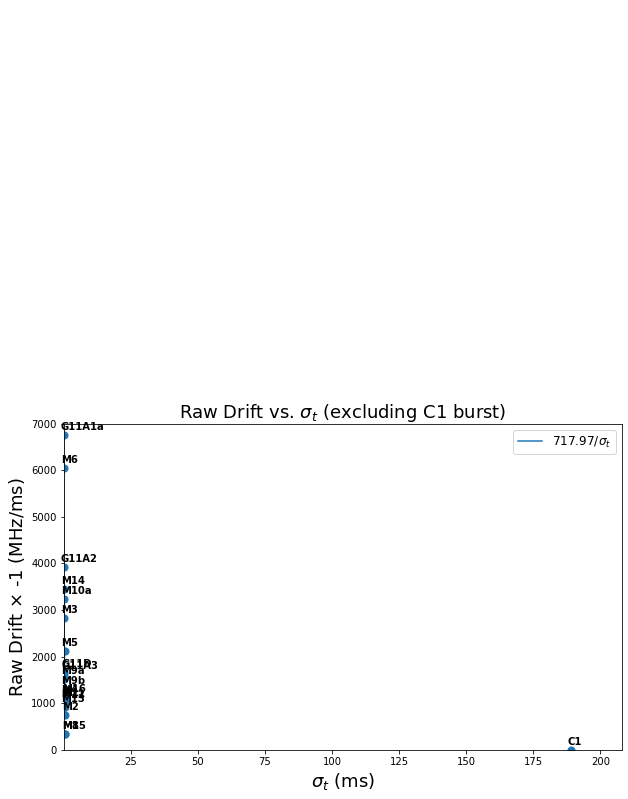

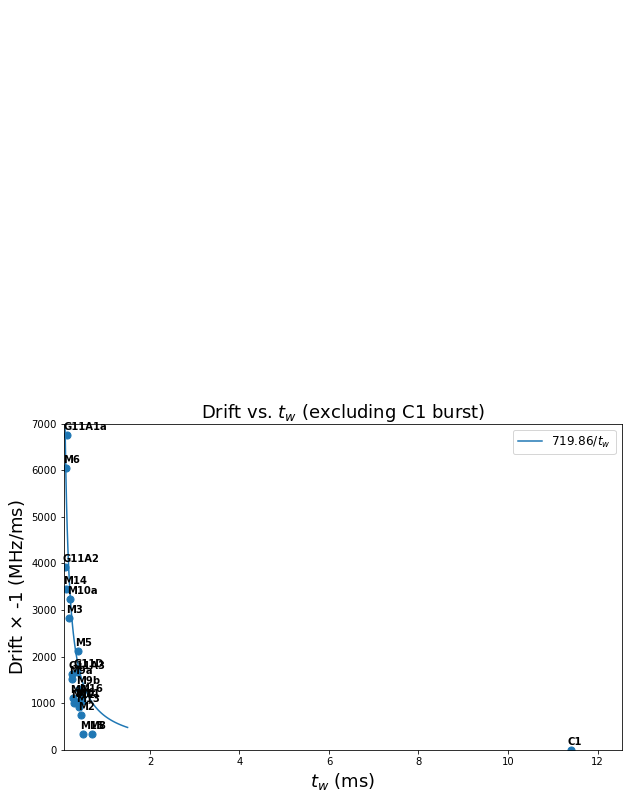

In [275]:
# all fit
ax = selectbursts.plot.scatter(x='sigma_t_ms', y='drift_abs', figsize=(10, 6), s=50)
for k, v in selectbursts.iterrows():
    ax.annotate(k, (v['sigma_t_ms'], v['drift_abs']), xytext=(-3,5), textcoords='offset points', weight='bold')
ax.set_xlim(0.9*min(selectbursts['sigma_t_ms']), 1.1*max(selectbursts['sigma_t_ms']))
ax.set_title('Raw Drift vs. $\sigma_t$ (excluding C1 burst)', size=fontsize)
ax.set_xlabel('$\sigma_t$ (ms)', size=fontsize)
ax.set_ylabel('Raw Drift $\\times$ -1 (MHz/ms)', size=fontsize)

popt, pcov = fitreciprocal(selectbursts['sigma_t_ms'], selectbursts['drift_abs'])
x = np.linspace(0, 1, num=100)
plt.plot(x, popt[0]/x, label='${:.2f}/\sigma_t$'.format(popt[0]))
plt.legend(fontsize='large')
ax.set_ylim(0, 7000)
# plt.savefig('drift_vs_sigmat.png')

ax = selectbursts.plot.scatter(x='tau_w_ms', y='drift_abs', figsize=(10, 6), s=50)
for k, v in selectbursts.iterrows():
    ax.annotate(k, (v['tau_w_ms'], v['drift_abs']), xytext=(-3,5), textcoords='offset points', weight='bold')
ax.set_xlim(0.9*min(selectbursts['tau_w_ms']), 1.1*max(selectbursts['tau_w_ms']))
# ax.set_xlim(0.9*min(selectbursts['sigma_t']), 1.1*max(selectbursts['sigma_t']))
ax.set_title('Drift vs. $t_w$ (excluding C1 burst)', size=fontsize)
ax.set_xlabel('$t_w$ (ms)', size=fontsize)
ax.set_ylabel('Drift $\\times$ -1 (MHz/ms)', size=fontsize)

popt, pcov = fitreciprocal(selectbursts['tau_w_ms'], selectbursts['drift_abs'])
x = np.linspace(0, 1.5, num=100)
plt.plot(x, popt[0]/x, label='${:.2f}$'.format(popt[0])+'/$t_w$')
plt.legend(fontsize='large')
ax.set_ylim(0, 7000)
plt.savefig('drift_vs_tw.png')

Text(0, 0.5, 'Drift $\\cdot \\overline{\\tau_{0}}/\\tau_{0}$')

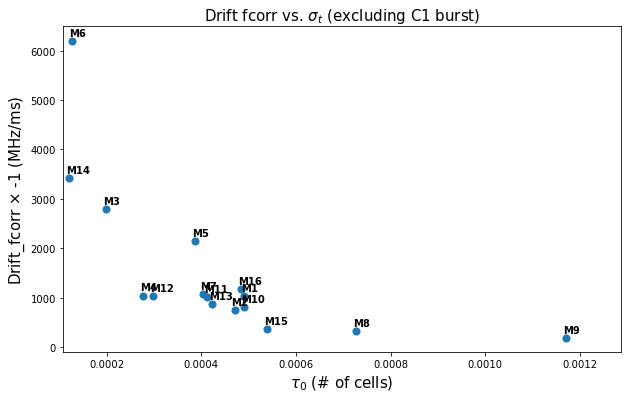

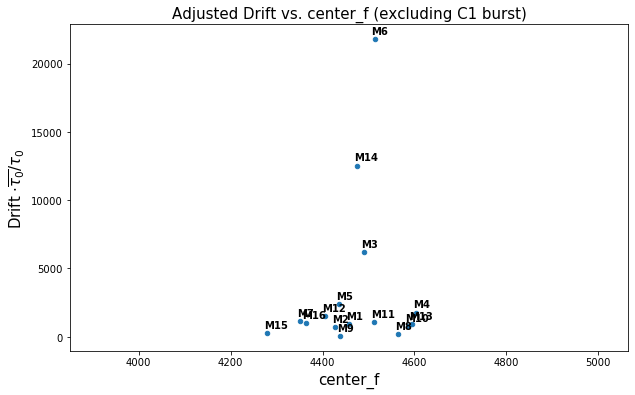

In [59]:
bursts['drift_fcorr'] = bursts['drift_abs'] * (np.mean(bursts.head(numbursts)['center_f']) /  bursts['center_f'])**2

ax = bursts.head(numbursts).plot.scatter(x='tau_0', y='drift_fcorr', figsize=(10, 6), s=50)
for k, v in bursts.head(numbursts).iterrows():
    ax.annotate(v['name'], (v['tau_0'], v['drift_fcorr']), xytext=(-3,5), textcoords='offset points', weight='bold')
ax.set_xlim(0.9*min(bursts.head(numbursts)['tau_0']), 1.1*max(bursts.head(numbursts)['tau_0']))
# ax.set_xlim(0.9*min(bursts.head(numbursts)['sigma_t']), 1.1*max(bursts.head(numbursts)['sigma_t']))
ax.set_title('Drift fcorr vs. $\sigma_t$ (excluding C1 burst)', size=fontsize)
ax.set_xlabel('$\\tau_0$ (# of cells)', size=fontsize)
ax.set_ylabel('Drift_fcorr $\\times$ -1 (MHz/ms)', size=fontsize)
# plt.savefig('drift_vs_sigmat3.png')

ax = bursts.head(numbursts).plot.scatter(x='center_f', y='drift_corr', figsize=(10, 6))
for k, v in bursts.head(numbursts).iterrows():
    ax.annotate(v['name'], (v['center_f'], v['drift_corr']), xytext=(-3,5), textcoords='offset points', weight='bold')
ax.set_xlim(0.9*min(bursts.head(numbursts)['center_f']), 1.1*max(bursts.head(numbursts)['center_f']))
ax.set_title('Adjusted Drift vs. center_f (excluding C1 burst)', size=fontsize)
ax.set_xlabel('center_f', size=fontsize)
ax.set_ylabel('Drift $\cdot \overline{\\tau_{0}}/\\tau_{0}$', size=fontsize)
# plt.savefig('adjusted_vs_centerf.png')

In [12]:
np.mean(bursts.head(numbursts)['center_f'])

4468.4997819375

<Figure size 432x288 with 0 Axes>

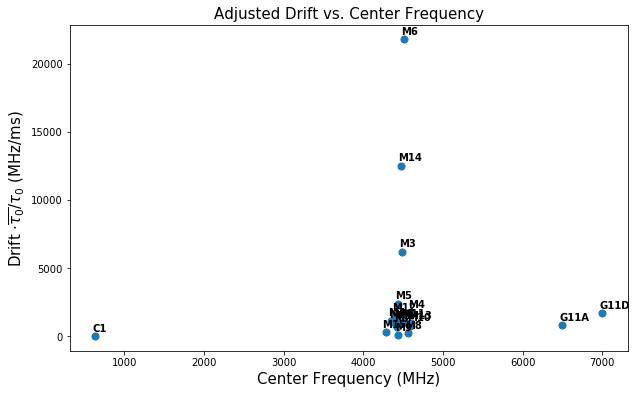

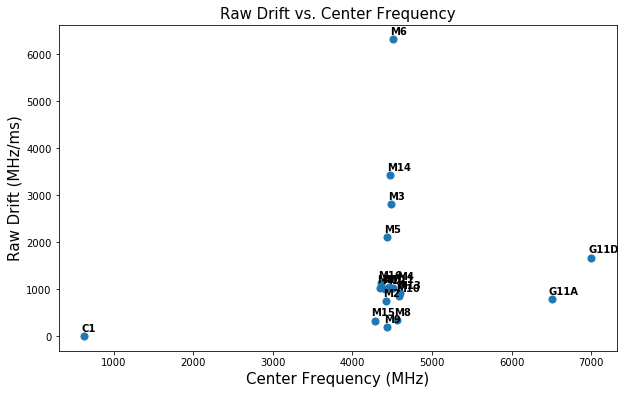

In [291]:
bursts['drift_corr']
bursts['drift_predicted'] = - bursts['center_f']**2 / bursts['tau_0']
plt.figure()
ax = bursts.plot.scatter(x='center_f', y='drift_corr', s=50, figsize=(10,6))
for k, v in bursts.iterrows():
    ax.annotate(v['name'], (v['center_f'], v['drift_corr']), xytext=(-3,5), textcoords='offset points', weight='bold')
ax.set_title('Adjusted Drift vs. Center Frequency', size=fontsize)
ax.set_xlabel('Center Frequency (MHz)', size=fontsize)
ax.set_ylabel('Drift $\cdot \overline{\\tau_{0}}/\\tau_{0}$ (MHz/ms)', size=fontsize)
plt.savefig('adjusted_vs_center.png')

ax = bursts.plot.scatter(x='center_f', y='drift_abs', s=50, figsize=(10,6))
for k, v in bursts.iterrows():
    ax.annotate(v['name'], (v['center_f'], v['drift_abs']), xytext=(-3,5), textcoords='offset points', weight='bold')
ax.set_title('Raw Drift vs. Center Frequency', size=fontsize)
ax.set_xlabel('Center Frequency (MHz)', size=fontsize)
ax.set_ylabel('Raw Drift (MHz/ms)', size=fontsize)
plt.savefig('rawdrift_vs_center.png')